<a href="https://colab.research.google.com/github/kdats/kdats/blob/main/LimeQualityIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
   CaCO₃ (%)  Moisture (%)  Avg Particle Size (mm)  Temp Profile (°C)  \
0  95.993428      4.324822                2.568253         844.295932   
1  94.723471      4.855481                2.984398         868.453458   
2  96.295377      4.207580                3.009008         852.896991   
3  98.046060      4.692038                3.236315         872.600209   
4  94.531693      3.106385                2.316571                NaN   

   Retention Time (hr)  Fuel Consumption (kg)  Available CaO (%)  \
0             4.983487             466.075263          78.955175   
1             4.748175             484.725027          81.991683   
2             4.913813             470.130947          77.166558   
3             5.357366             505.520902          82.671774   
4             5.638928             559.858927          79.943247   

   Reactivity (sec)  Kiln Feed Rate (tons/hour)  Kiln Temperature (°C)  \
0          8.438616                   61.748141             

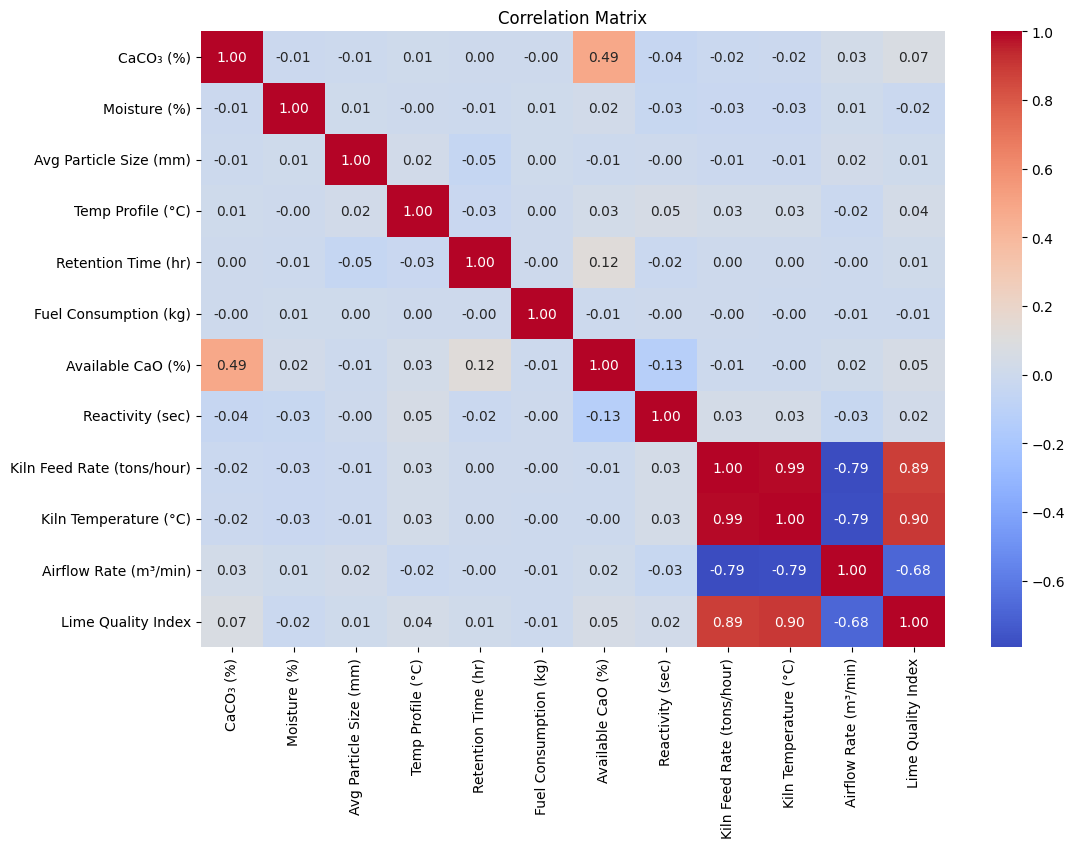


Features with High Correlation to Lime Quality Index:
['Kiln Feed Rate (tons/hour)', 'Kiln Temperature (°C)', 'Airflow Rate (m³/min)', 'Lime Quality Index']

Model Evaluation:
Mean Squared Error (MSE): 9.06
R² Score: 0.80

Feature Coefficients:
                      Feature  Coefficient
1       Kiln Temperature (°C)     0.304495
2       Airflow Rate (m³/min)     0.050117
0  Kiln Feed Rate (tons/hour)    -0.038847


<Figure size 1000x600 with 0 Axes>

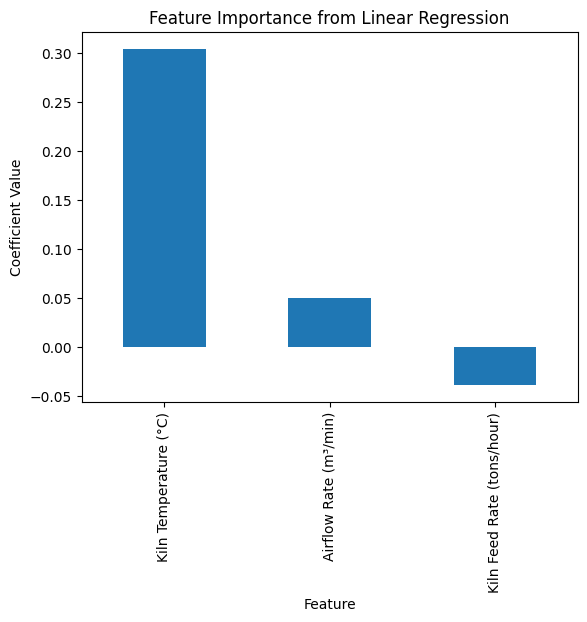

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/lime_quality_full_dataset.csv'  # Adjust path as necessary
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['Batch ID'], axis=1)  # Batch ID is irrelevant for predictions

# 1. Data Exploration
print("Dataset Overview:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing data
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values with mean (if any)
data.fillna(data.mean(), inplace=True)

# 2. Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Select features with high correlation to Lime Quality Index
target = 'Lime Quality Index'
high_corr_features = correlation_matrix[target][correlation_matrix[target].abs() > 0.5].index.tolist()
print("\nFeatures with High Correlation to Lime Quality Index:")
print(high_corr_features)

# 3. Prepare Data for Modeling
X = data[high_corr_features].drop(columns=[target])  # Input features
y = data[target]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




# 4. Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#################TRAIN RSquare Check ####################
# Test prediction
y_pred1 = model.predict(X_train)
# Evaluation Metrics
mse = mean_squared_error(y_train, y_pred1 )
r2 = r2_score(y_train, y_pred1)
#########################################################

# 5. Evaluate the Model
y_pred = model.predict(X_test)


# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 6. Coefficients of the Linear Model
print("\nFeature Coefficients:")
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

# 7. Insights from Correlation Matrix
# Identify key input parameters affecting lime quality
plt.figure(figsize=(10, 6))
coefficients.plot(kind="bar", x="Feature", y="Coefficient", legend=False)
plt.title("Feature Importance from Linear Regression")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.show()


In [ ]:

y_pred1 = model.predict(X_train)
y_pred1
# Evaluation Metrics
mse = mean_squared_error(y_train, y_pred1 )
r2 = r2_score(y_train, y_pred1)
r2

0.8043500894020581

In [ ]:
high_corr_features

['Kiln Feed Rate (tons/hour)',
 'Kiln Temperature (°C)',
 'Airflow Rate (m³/min)',
 'Lime Quality Index']

Threshold for anomalies: 7.89
Number of anomalies detected: 9

Anomalous data points:
      Kiln Feed Rate (tons/hour)  Kiln Temperature (°C)  Airflow Rate (m³/min)
792                    66.826476             136.761634              14.985589
1931                   32.093490              69.726483              33.996034
782                    53.997799             108.948490              17.856710
807                    46.789206              96.675897              14.108312
855                    31.883602              68.233363              31.078634
693                    50.308495             110.304258              23.017996
1766                   42.331305              91.560054              22.087574
479                    32.217973              66.501723              34.405001
485                    48.641270              99.071682              23.656291


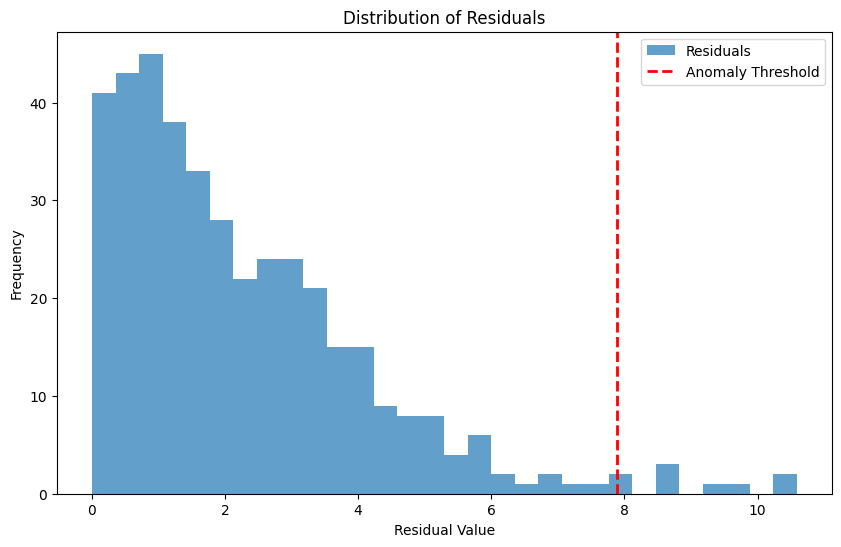

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Filter the data to include only the important features
important_features = ['Kiln Feed Rate (tons/hour)', 'Kiln Temperature (°C)', 'Airflow Rate (m³/min)', 'Lime Quality Index']
data_filtered = data[important_features]

# Define input features (X) and target variable (y)
X = data_filtered.drop(columns=['Lime Quality Index'])
y = data_filtered['Lime Quality Index']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Lime Quality Index for the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = np.abs(y_test - y_pred)

# Set an anomaly threshold (e.g., mean + 3 standard deviations)
threshold = np.mean(residuals) + 3 * np.std(residuals)

# Identify anomalies
anomalies = residuals > threshold
anomalous_data = X_test[anomalies]

# Print anomaly detection results
print(f"Threshold for anomalies: {threshold:.2f}")
print(f"Number of anomalies detected: {anomalous_data.shape[0]}")
print("\nAnomalous data points:")
print(anomalous_data)

# Visualization of residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, label='Residuals')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Anomaly Threshold')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
